# Identifying High Quality Rivers and Streams in Connecticut

### Abstract
---

The objective of the clean water act is to 'restore and maintain the chemical, physical and biological integrity of the Nation's waters.'  However, much of the work conducted to date both around the country and in Connecticut has focused on restoring impaired waters. More recent work under EPA's [healthy watersheds program](https://www.epa.gov/hwp) and [in Connecticut](https://portal.ct.gov/-/media/DEEP/water/water_quality_management/monitoringpubs/Bellucci-et-al-2011-Northeastern-Naturalist.pdf) has begun to bring more emphasis on protecting high quality waters.  These efforts are needed as [preliminary work in Connecticut](https://marybecker.github.io/Biointegrity/) noted the possible reduction of taxa highly sensitive to pollution (BCG 2 - Figure 1) at long-term sentinel stream monitoring stations over the past ~ 30 years.  

This project seeks to explore how drainage basin characteristics differ in least disturbed high quality Connecticut streams that support highly sensitive taxa compared to streams with more human alteration.  This information will be used to identify and map the high quality streams across the State of Connecticut.  This type of information could be used to target and support protective management efforts for these streams.

![TaxaBCG](images/TaxaBCG.png)
*Figure 1:  Changes in macroinvertebrate communities along the stream stressor gradient.  Figure design - Jill Baker - CT DEEP Intern*

### Background
---

Biological integrity is the ability of an aquatic ecosystem to support and maintain a balanced, adaptive community of organisms having a species composition, diversity, and functional organization comparable to that of natural habitats within a region. The presence, condition, numbers and types of fish, insects, algae, plants, and other organisms provide direct, accurate information about the health of water bodies. Biological assessments measure these factors and are the primary tool used to evaluate the condition of water bodies. Because biological communities are affected by all of the stressors to which they are exposed over time, bioassessments provide information on disturbances not always revealed by water chemistry or other measurements.

In this analysis, biological condition as measured by the benthic macroinvertebrate community is explored at sampling sites in Connecticut in relation to upstream drainage basin characteristics. Benthic macroinvertebrates are animals without backbones, who inhabit the bottom of rivers and streams, as well as many other waterbody types. These organisms are very well studied and have a long history of use as indicators of water quality. Certain types, including mayflies, stoneflies, and caddisflies, can survive only in the cleanest water quality conditions. Other major groups of macroinvertebrates are true flies, beetles, worms, crustaceans, and dragonflies. Tolerant species are those that can live in highly polluted waters, moderate species can endure a moderate level of pollution, while sensitive species only occur in waters with little to no pollution. Macroinvertebrate community data are summarized into biological condition gradient (BCG) (Davies & Jackson, 2006) metrics that describe the biological condition of the stream.  A BCG 2 stream is indicative of a community in a least disturbed condition, while a BCG 5 or 6 are streams that are highly disturbed and polluted.

[Cold water streams](doi:10.1080/02755947.2013.855280) in Connecticut also support native and sensitive fish species.  Recent work has identified and [mapped](https://ctdeepwatermonitoring.github.io/ColdWaterHab/) these locations across the state.

### Data Sources

- [Summarized Biological Condition Metrics collected in CT Rivers and Streams 1990 - 2017](data/bcg_BugSites_HydroID.csv) - CT DEEP Inland Monitoring and Assessment
- [Drainage basin characteristics calculated to develop and support CT Streamflow Classifications](https://ctdeep.maps.arcgis.com/home/item.html?id=8937c3fa9fa7448b9fb6cc308d616eb6) - CT DEEP

### References
Beauchene,M.,Becker, M., Bellucci, C.J., Hagstrom, N., Kanno, Y. 2014. Summer Thermal Thresholds of Fish Community Transitions in Connecticut Streams, North American Journal of Fisheries Management, 34:1, 119-131, doi:10.1080/02755947.2013.855280.

Bellucci, C.J., Becker, M., Beauchene, M. 2011. Characteristics of macroinvertebrate and fish communities from 30 least disturbed small streams in Connecticut. [Northeastern Naturalist 18:411-444](https://portal.ct.gov/-/media/DEEP/water/water_quality_management/monitoringpubs/Bellucci-et-al-2011-Northeastern-Naturalist.pdf)

Bellucci, C., Becker M., Beauchene, M. Dunbar, L. 2013. Classifying the Health of Connecticut Streams Using Benthic Macroinvertebrates with Implications for Water Management. Environmental Management. 51: 1274. https://doi.org/10.1007/s00267-013-0033-9 

Connecticut Department of Energy and Environmental Protection Monitoring and Assessment Program.  1987 – 2017. Macroinvertebrate Community Data Collected in High Gradient Rivers and Streams of Connecticut. 

Connecticut Department of Energy and Environmental Protection (CT DEEP). 2015. [Ambient Water Quality Monitoring Program Strategy, 2015-2024. Connecticut Department of Energy and Environmental Protection. Hartford, CT 06106.](https://portal.ct.gov/-/media/DEEP/water/water_quality_management/monitoringpubs/monstrategy20152024finalpdf.pdf?la=en)

Davies S.P., Jackson S.K. 2006. The biological condition gradient: a descriptive model for interpreting change in aquatic ecosystems. EcologicalApplications 16:1251–1266.
 
Gerritsen J, Jessup B. 2007. Calibration of the biological condition gradient for high gradient streams of Connecticut. Report prepared for US EPA Office of Science and Technology and the Connecticut Department of Environmental Protection. TetraTech, Maryland.

### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data and Combine

In [2]:
hwater_df = pd.read_csv('data/bcg_BugSites_HydroID.csv')
hsi_df = pd.read_csv('data/HSI_Catchment_AllCalcs.csv')
hwater_hsi = pd.merge(hwater_df, hsi_df)

### Clean, Modify and Export

In [3]:
# Look at the first and last 10 rows of data
hwater_hsi.head(10)

,STA_SEQ,Station_Na,YLat,XLong,MinOfNomin,CountOfNom,HydroID,DrainID,Strahler,FNODE_,...,POTW_CFS,DivQ99,POTWQ99,DamStrMi,ICMetric,DIVMetric,DAMMetric,STPMetric,SumMetric,HSI
0,16334,Nonewaug River,41.6255,-73.1593,3,1,103004431,103004431,1,11797,...,0.000,0.0,0.0,0.00000,3.0,1.0,1.0,1.0,6.0,2.0
1,16505,BIBLE ROCK BROOK,41.4975,-72.6064,2,1,106001676,106001676,1,26580,...,0.000,0.0,0.0,0.00000,1.0,1.0,1.0,1.0,4.0,1.0
2,16603,DAY MEADOW BROOK,41.5803,-72.4083,5,1,106002429,106002429,1,41802,...,0.000,0.0,0.0,0.00000,2.0,1.0,1.0,1.0,5.0,1.0
3,15169,Roaring Brook,41.7594,-72.8808,4,2,105001230,105001230,2,811,...,0.000,0.0,0.0,0.00000,3.0,1.0,1.0,1.0,6.0,2.0
4,17299,Cuff Brook,41.5409,-72.9485,4,2,104000191,104000191,1,152,...,0.000,0.0,0.0,0.00000,3.0,1.0,1.0,1.0,6.0,2.0
5,16972,PITCH BROOK,41.7067,-73.1619,2,1,103009643,103009643,1,9408,...,0.000,0.0,0.0,0.00000,1.0,1.0,1.0,1.0,4.0,1.0
6,15752,Eagleville Brook,41.8089,-72.2633,5,1,107001744,107001744,1,33961,...,4.641,0.0,0.0,0.00000,3.0,1.0,1.0,1.0,6.0,2.0
7,16331,Sumner Brook,41.4835,-72.6375,2,1,106001514,106001514,2,22655,...,0.000,0.0,0.0,0.52356,1.0,1.0,3.0,1.0,6.0,2.0
8,14840,Mountain Brook,41.9741,-72.8375,2,2,105000748,105000748,2,4308,...,0.000,0.0,0.0,0.00000,1.0,1.0,1.0,1.0,4.0,1.0
9,15301,Eagleville Brook,41.8067,-72.2646,5,3,107001725,107001725,2,33493,...,4.641,0.0,0.0,0.00000,3.0,1.0,1.0,1.0,6.0,2.0


In [4]:
hwater_hsi.tail(10)

,STA_SEQ,Station_Na,YLat,XLong,MinOfNomin,CountOfNom,HydroID,DrainID,Strahler,FNODE_,...,POTW_CFS,DivQ99,POTWQ99,DamStrMi,ICMetric,DIVMetric,DAMMetric,STPMetric,SumMetric,HSI
563,16304,Quinebaug River,41.7809,-71.9010,3,2,109003033,109003033,6,3014,...,19.198270,0.940483,0.319327,0.033342,2.0,2.0,2.0,2.0,8.0,2.0
564,16066,Farmington River,41.9140,-72.7650,4,3,105000529,105000529,6,3166,...,45.163604,21.014353,0.608173,0.045662,2.0,3.0,2.0,2.0,9.0,3.0
565,16225,Farmington River,41.9015,-72.6708,5,2,105000461,105000461,6,2849,...,45.163604,20.252746,0.580776,0.046480,2.0,3.0,2.0,2.0,9.0,3.0
566,14598,Quinebaug River,41.6022,-71.9868,4,4,109003929,109003929,6,3925,...,21.962759,0.934204,0.225177,0.031741,2.0,2.0,2.0,2.0,8.0,2.0
567,14254,Housatonic River,41.8906,-73.3576,4,3,103004659,103004659,5,4523,...,2.197065,0.201794,0.028512,0.018371,1.0,2.0,2.0,2.0,7.0,2.0
568,14251,Housatonic River,41.8806,-73.3654,4,3,103005156,103005156,5,4849,...,2.197065,0.201227,0.028432,0.018296,1.0,2.0,2.0,2.0,7.0,2.0
569,16327,Housatonic River,41.8508,-73.3758,4,1,103005749,103005749,5,5461,...,2.197065,0.197439,0.027897,0.019401,1.0,2.0,2.0,2.0,7.0,2.0
570,16065,Housatonic River,41.8148,-73.3760,3,1,103006566,103006566,5,6348,...,2.197065,0.191631,0.027076,0.019454,1.0,2.0,2.0,2.0,7.0,2.0
571,16076,Housatonic River,41.7673,-73.4379,4,1,103007804,103007804,5,7556,...,2.197065,0.184467,0.026064,0.019948,1.0,2.0,2.0,2.0,7.0,2.0
572,15886,HOUSATONIC RIVER,41.6475,-73.4838,4,1,103010804,103010804,6,11015,...,2.367260,0.147280,0.020411,0.020848,1.0,2.0,2.0,2.0,7.0,2.0


In [5]:
# Get all of the column names
hwater_hsi.columns

Index(['STA_SEQ', 'Station_Na', 'YLat', 'XLong', 'MinOfNomin', 'CountOfNom',
       'HydroID', 'DrainID', 'Strahler', 'FNODE_', 'TNODE_', 'NHDRCH_ID',
       'StrMi', 'SqMi', 'Dam', 'Div', 'ICCnt', 'ICSum', 'POTW', 'IC_Avg',
       'SD_Pct', 'Q99', 'DIV_CFS', 'POTW_CFS', 'DivQ99', 'POTWQ99', 'DamStrMi',
       'ICMetric', 'DIVMetric', 'DAMMetric', 'STPMetric', 'SumMetric', 'HSI'],
      dtype='object')

In [6]:
# Remove columns that are not needed for analysis
to_drop = ['DrainID', 'FNODE_', 'TNODE_', 'NHDRCH_ID']
hwater_hsi = hwater_hsi.drop(to_drop, axis=1)

In [7]:
#rename a single column
hwater_hsi.rename(index=str, columns={'MinOfNomin': 'BCG'}, inplace=True)

In [8]:
#Count the number in each BCG class
hwater_hsi.groupby('BCG')['BCG'].count()

BCG
2     68
3    210
4    132
5    162
6      1
Name: BCG, dtype: int64

In [9]:
#Remove one site with BCG 6
hwater_hsi = hwater_hsi[hwater_hsi['BCG'] < 6]

In [10]:
#Check for missing values
hwater_hsi.isnull()
hwater_hsi.isnull().sum() # count missing values in each column

STA_SEQ       0
Station_Na    0
YLat          0
XLong         0
BCG           0
CountOfNom    0
HydroID       0
Strahler      0
StrMi         0
SqMi          0
Dam           0
Div           0
ICCnt         0
ICSum         0
POTW          0
IC_Avg        0
SD_Pct        0
Q99           0
DIV_CFS       0
POTW_CFS      0
DivQ99        0
POTWQ99       0
DamStrMi      0
ICMetric      0
DIVMetric     0
DAMMetric     0
STPMetric     0
SumMetric     0
HSI           0
dtype: int64

In [11]:
#Export clean combined data
hwater_hsi.to_csv('data/hwater_hsi.csv', index=False)

### Explore and Plot the Data

In [12]:
#get the number of rows in the data from
len(hwater_hsi)

572

In [13]:
#get info on the dataframe
hwater_hsi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 572 entries, 0 to 572
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   STA_SEQ     572 non-null    int64  
 1   Station_Na  572 non-null    object 
 2   YLat        572 non-null    float64
 3   XLong       572 non-null    float64
 4   BCG         572 non-null    int64  
 5   CountOfNom  572 non-null    int64  
 6   HydroID     572 non-null    int64  
 7   Strahler    572 non-null    int64  
 8   StrMi       572 non-null    float64
 9   SqMi        572 non-null    float64
 10  Dam         572 non-null    float64
 11  Div         572 non-null    float64
 12  ICCnt       572 non-null    float64
 13  ICSum       572 non-null    float64
 14  POTW        572 non-null    float64
 15  IC_Avg      572 non-null    float64
 16  SD_Pct      572 non-null    float64
 17  Q99         572 non-null    float64
 18  DIV_CFS     572 non-null    float64
 19  POTW_CFS    572 non-null    float6

In [14]:
#count the unique number of station IDs
len(hwater_hsi['STA_SEQ'].value_counts()) #one way, provides value count of each station ID

572

In [15]:
hwater_hsi['STA_SEQ'].nunique()  #pandas nunique

572

In [16]:
#Exploratory Stats on select watershed calculations
hwater_hsi[['StrMi','SqMi','IC_Avg','SD_Pct','DivQ99','POTWQ99','DamStrMi','HSI']].describe()

,StrMi,SqMi,IC_Avg,SD_Pct,DivQ99,POTWQ99,DamStrMi,HSI
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,95.786824,40.560839,5.092637,10.407771,124.843979,1.424873,0.077727,1.993007
std,219.276534,101.986363,6.427587,10.642123,1327.040446,11.525630,0.087630,0.746236
min,0.110000,0.025876,0.022943,0.000000,0.000000,0.000000,0.000000,1.000000
25%,9.877500,4.368669,0.875458,3.262090,0.000000,0.000000,0.000000,1.000000
50%,30.654233,11.921592,2.204509,7.206024,0.000000,0.000000,0.059714,2.000000
75%,72.980000,28.973399,7.231082,13.962797,11.377379,0.000000,0.114627,3.000000
max,1822.725269,971.523360,52.493607,62.686567,29304.187519,156.200464,0.609756,3.000000


In [17]:
#Example of Groupby summary stats
bcg_ic = hwater_hsi[['BCG','IC_Avg']].groupby('BCG').describe()
bcg_ic

IC_Avg                                                                \
     count       mean       std       min       25%       50%        75%   
BCG                                                                        
2     68.0   0.642916  0.662294  0.022943  0.151704  0.405184   0.801832   
3    210.0   2.408315  3.247550  0.042129  0.681762  1.286386   2.635995   
4    132.0   5.000581  4.827520  0.349920  1.240608  3.072105   7.961184   
5    162.0  10.515107  8.144519  0.068289  4.355110  8.840201  14.098283   

                
           max  
BCG             
2     3.088174  
3    20.214209  
4    24.691819  
5    52.493607

In [18]:
#Summary statistics by hydrologic stressor metric
bcg_hsi = hwater_hsi[['BCG','SumMetric']].groupby('BCG').describe()
bcg_hsi

SumMetric                                               
        count      mean       std  min  25%  50%   75%   max
BCG                                                         
2        68.0  4.750000  0.967764  4.0  4.0  4.0   5.0   8.0
3       210.0  6.157143  1.645371  4.0  5.0  6.0   7.0  12.0
4       132.0  7.484848  1.843018  4.0  6.0  8.0   9.0  12.0
5       162.0  9.074074  1.932255  5.0  8.0  9.0  10.0  12.0

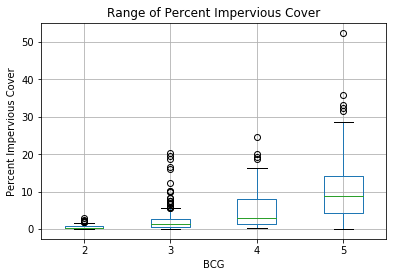

In [19]:
#Exploratory Boxplots
#Percent Impervious Cover
hwater_hsi.boxplot(['IC_Avg'], by='BCG')
plt.ylabel('Percent Impervious Cover')
plt.suptitle('')
plt.title('Range of Percent Impervious Cover')
plt.show()

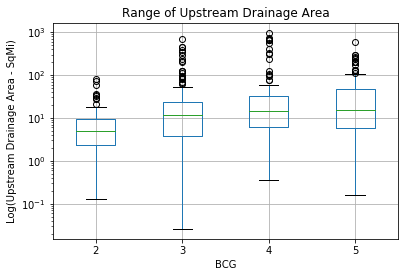

In [20]:
#Upstream drainage area
hwater_hsi.boxplot(['SqMi'], by='BCG')
plt.ylabel('Log(Upstream Drainage Area - SqMi)')
plt.yscale('log')
plt.suptitle('')
plt.title('Range of Upstream Drainage Area')
plt.show()

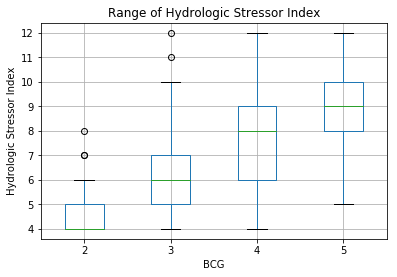

In [21]:
# Drainage Basin Streamflow Disturbance Metric
hwater_hsi.boxplot(['SumMetric'], by='BCG')
plt.ylabel('Hydrologic Stressor Index')
plt.suptitle('')
plt.title('Range of Hydrologic Stressor Index')
plt.show()

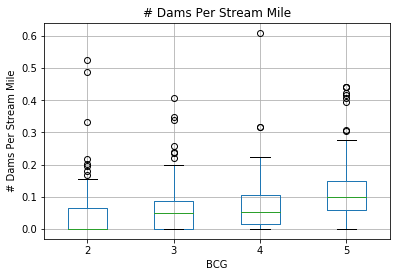

In [22]:
# Number of dams per stream mile in the upstream drainage basin
hwater_hsi.boxplot(['DamStrMi'], by='BCG')
plt.ylabel('# Dams Per Stream Mile')
plt.suptitle('')
plt.title('# Dams Per Stream Mile')
plt.show()

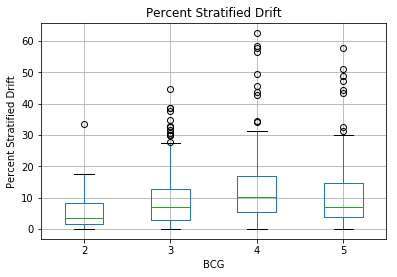

In [23]:
# Percent stratified drift in the upstream drainage basin
hwater_hsi.boxplot(['SD_Pct'], by='BCG')
plt.ylabel('Percent Stratified Drift')
plt.suptitle('')
plt.title('Percent Stratified Drift')
plt.show()

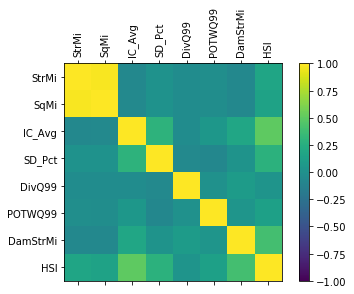

In [24]:
#Look at correlations between some of the drainage basin characteristics
env = ['StrMi','SqMi','IC_Avg','SD_Pct','DivQ99','POTWQ99','DamStrMi','HSI']
corr = hwater_hsi[env].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='viridis', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(hwater_hsi[env].columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(env)
ax.set_yticklabels(hwater_hsi[env].columns)
plt.show()